## Convolutional Neural Networks (CNN's)

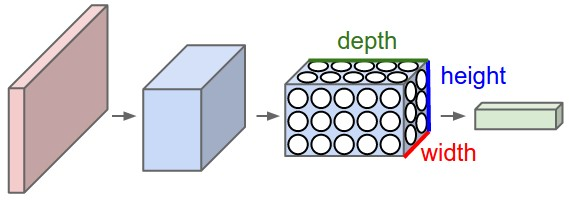

## CNN at a glance

Let us assume we trained a CNN model on this image.
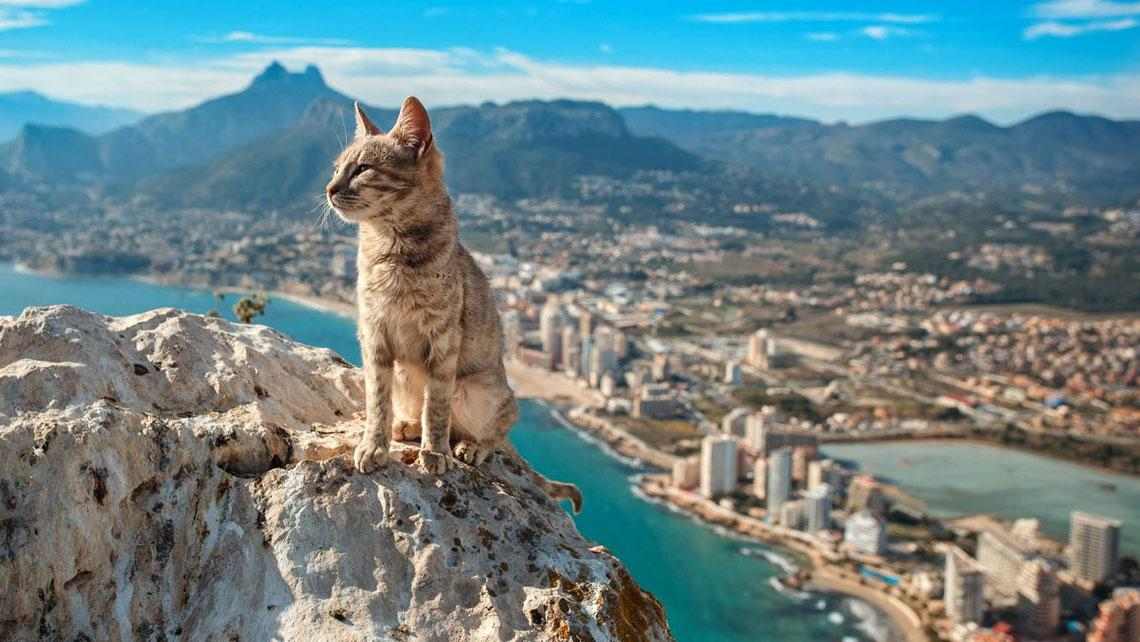

Now If I ask the model whether this is a cat or not? It will say ```Yes```, its a cat.
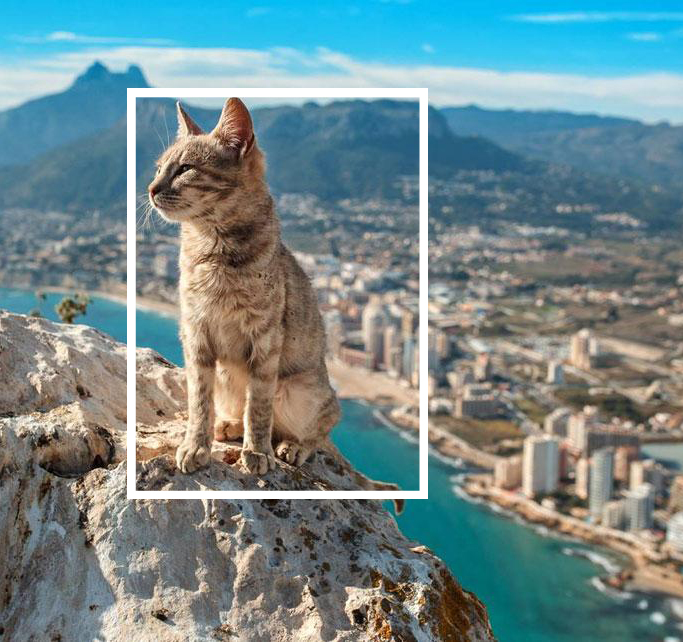


Even this is a also a cat.
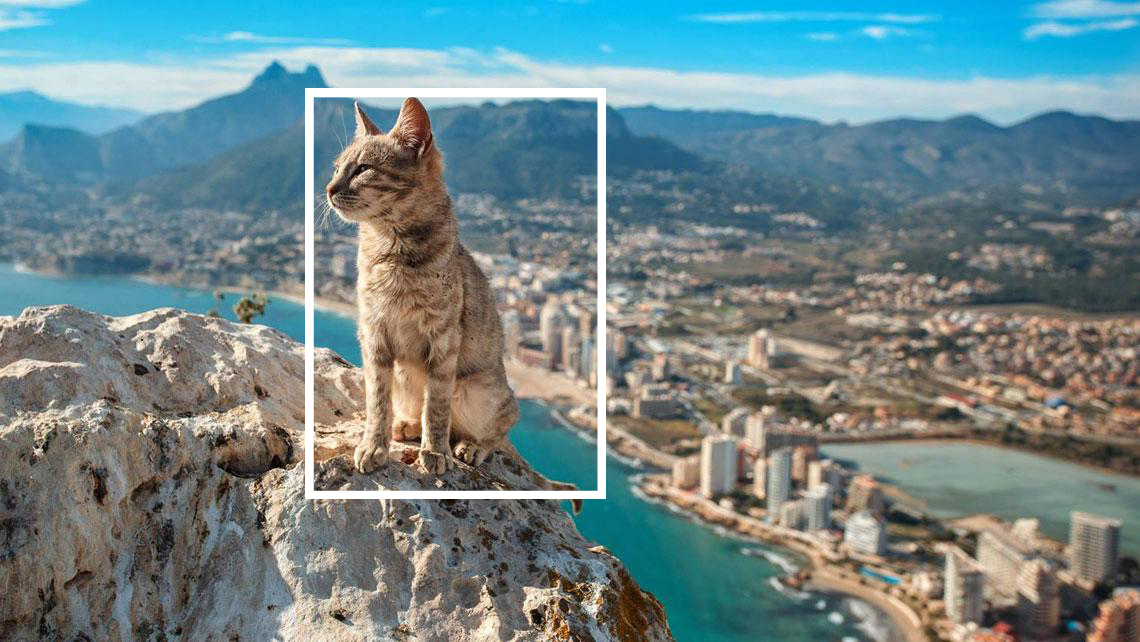

This too!
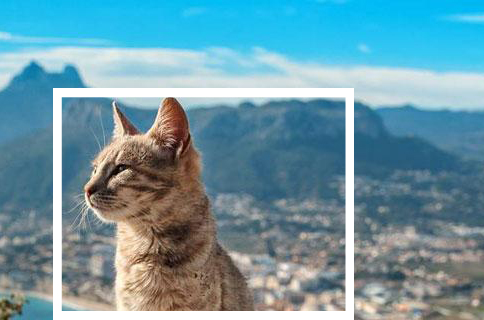

And yeah, this too!!
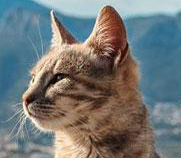

## WORKING

It tries to match the template image with whole smaple image. 
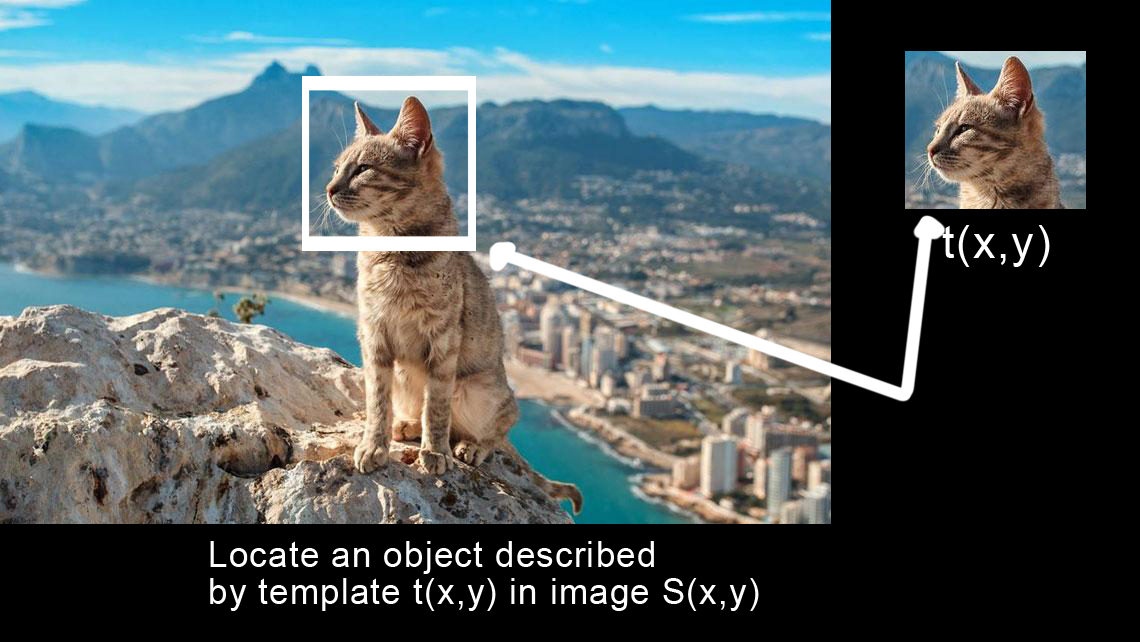

```Libraries```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def drawImg(img, title = "Image"):
    
    plt.imshow(img, cmap = 'gray')
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title + str(img.shape))
    plt.show()

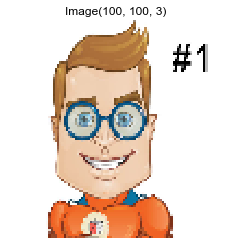

In [3]:
img_color = cv.imread("./images/cody2.jpg")
img_color = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
img_color = cv.resize(img_color, (100, 100))
drawImg(img_color)

```Note``` : In order to keep thing easier, we will be using a ```Grayscale``` image

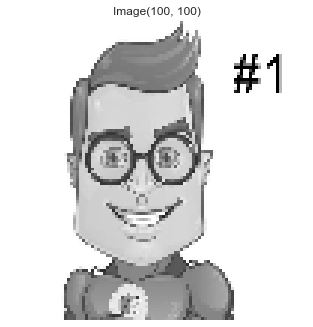

In [4]:
img_gray = cv.cvtColor(img_color, cv.COLOR_RGB2GRAY)
drawImg(img_gray)

## Deeper Look
![Alt Text](https://github.com/prateek27/convolution-neural-network-tutorial/raw/59a316a1e6a9fa0f283b82fc18f9b40a05f58c44/images/Convolution_schematic.gif)

In [5]:
def Convolution(img, img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] # Assuming it's a square filter
    
    #Creating a convolved feature matrix
    new_img = np.zeros((W - F + 1, H - F + 1))
    
    for row in range(W - F + 1):
        for column in range(H - F + 1):
            #The upper 2 loops are for traversing over entire sample image
            
            for i in range(F):
                for j in range(F):
                    #These 2 loops are for taking element wise product
                    new_img[row][column] += img[row + i][column + j] * img_filter[i][j]
                    
                # Make sure that RGB values lies in btw 0 to 255
                if new_img[row][column] > 255:
                    new_img[row][column] = 255
                
                elif new_img[row][column] < 0:
                    new_img[row][column] = 0
            
        
    
    return new_img # Activation map or Convolved Matrix
                    
    

``` Blur Filter```

In [6]:
blur_filter = np.ones((3, 3))/9.0
output = Convolution(img_gray, blur_filter)

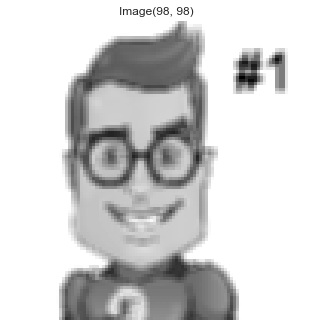

In [7]:
drawImg(output)

``` Edge Detection```

In [8]:
edge_filter = np.array([[1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]])
edges = Convolution(img_gray, edge_filter)

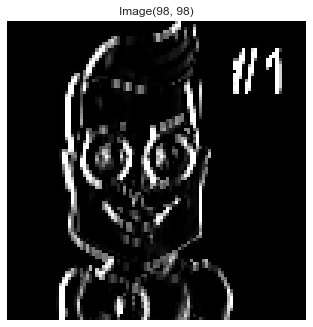

In [9]:
drawImg(edges)

# How Convolutional Network work?

<video controls src="./vid.mp4"
       style="width:100%;"       >

There are more than 1 filters just like we had ```Blur Filter ``` and ```Edge Detection Filter``` while working with ```Convolutional Network```.\
Now these 2 filters will create 2 ```feature/activation``` map, which will later on gets stacked to each other as you can see in output volume

Suppose you have a ```32x32x3``` image and there are 6 filters of size ```5x5x3```.\
Now, we will be having 6 activation maps of size ```28x28x3```\
Here comes the step of stacking all the activation maps together

<img src = "./images/conv_6.png">

### ```Padding```
In order to retain the shape of original image, we use padding. For the example above we have a ```32x32x3``` image and we wish to have the activation map of shape ```32x32```. For such purpose if use an image of ```36x36x3``` then we will be having an activation image of the required shape

In [21]:
padded_img = np.pad(img_color, ((10, 10), (10, 10), (0, 0)), 'constant', constant_values = 0)

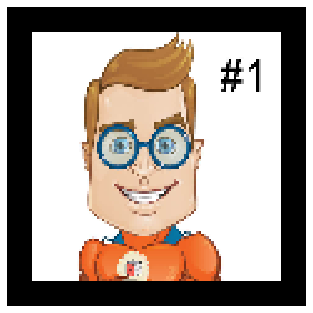

In [22]:
plt.imshow(padded_img)
plt.axis("off");

## Pooling 

<img src = "./images/mp.png">

A pooling layer is another building block of a CNN. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. Pooling layer operates on each feature map independently.

In [23]:
X = np.array([[1, 0, 2, 3],
              [4, 6, 6, 8],
              [3, 1, 1, 0],
              [1, 2, 2, 4]
             ])

In [26]:
def pooling(X, mode = "max"):
    
    f = 2 # Window Size
    stride = 2 #We will be skipping 2 pixels at a time
    
    H, W = X.shape
    
    H_output = int((H - f)/stride) + 1
    W_output = int((W - f)/stride) + 1
    
    output = np.zeros((H_output, W_output))
      
    for r in range(H_output):
        for c in range(W_output):
            
            r_start = r * stride
            c_start = c * stride
            r_end   = r_start + f
            c_end   = c_start + f
            
            X_slice = X[r_start : r_end, c_start : c_end]
            
            if mode == 'max':
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
        
        
    return output
    

In [27]:
pooling_result = pooling(X, mode = 'max')

In [29]:
pooling_result

array([[6., 8.],
       [3., 4.]])